### Download and unzip the COCO dataset

In [ ]:
!mkdir /content/coco
%cd /content/coco
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

/content/coco
--2024-11-12 09:25:17--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.9.145, 52.216.33.161, 54.231.129.49, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.9.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  38.8MB/s    in 7m 59s  

2024-11-12 09:33:16 (38.5 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2024-11-12 09:33:16--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.234.89, 52.216.240.172, 52.217.172.73, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.234.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===============

In [ ]:
!unzip train2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip


Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/00000019

 ## Load and Parse COCO Annotations
Use the pycocotools library, which provides easy access to the COCO dataset structure. If it’s not installed, install it with:

In [ ]:
!pip install pycocotools


In [ ]:
!pip install tensorflow opencv-python-headless

##  Sample load and parse bounding boxes and class IDs from the COCO annotation files.

In [ ]:
from pycocotools.coco import COCO
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the annotation file and images directory
ANNOTATION_FILE = '/content/coco/annotations/instances_train2017.json'
IMAGE_DIR = '/content/coco/train2017'

# Initialize COCO API for instance annotations
coco = COCO(ANNOTATION_FILE)

# Function to load image and its annotations
def load_image_and_annotations(image_id):
    # Get image information
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(IMAGE_DIR, image_info['file_name'])
    image = cv2.imread(image_path)

    # Load annotations (bounding boxes and category IDs)
    ann_ids = coco.getAnnIds(imgIds=image_id)
    anns = coco.loadAnns(ann_ids)

    boxes = []
    class_ids = []
    for ann in anns:
        bbox = ann['bbox']
        category_id = ann['category_id']

        # COCO bounding box format is [x, y, width, height]
        x, y, width, height = bbox
        boxes.append([x, y, x + width, y + height])
        class_ids.append(category_id)

    return image, boxes, class_ids

# Display an example image with bounding boxes
def display_image_with_boxes(image, boxes, class_ids):
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = coco.loadCats(class_ids[i])[0]["name"]
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
image_ids = coco.getImgIds()
for image_id in image_ids[:5]:  # Display the first 5 images
    image, boxes, class_ids = load_image_and_annotations(image_id)
    display_image_with_boxes(image.copy(), boxes, class_ids)


## Implementation:

- Data Preparation: Preprocess the dataset by resizing images, normalizing
pixel values, and, if necessary, labeling bounding boxes for objects.
- Model Building: Implement the selected object detection algorithm using
appropriate libraries (e.g., OpenCV for HOG-SVM, TensorFlow/Keras for
YOLO or SSD).
- Training the Model: Use the training data to train the object detection
model. For deep learning methods, fine-tune hyperparameters (e.g.,
learning rate, batch size, epochs) to optimize model performance.
- Testing: Evaluate the model on a test set to assess its detection capabilities.
Ensure to capture edge cases where the model may struggle.

In [10]:
# Import Libraries

import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import time
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import defaultdict

##  Load YOLO and SSD Models  

Use pre-trained Algorithm

In [ ]:
# Load YOLO and SSD models from TensorFlow Hub
ssd_model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
ssd_model = hub.load(ssd_model_url)

yolo_model_url = "https://tfhub.dev/tensorflow/efficientdet/d0/1"  # Replace with actual YOLO model URL if available
yolo_model = hub.load(yolo_model_url)


## Data Preparation: Load and Preprocess Images
Load images from the COCO dataset directory, resize them to the target model input size, and normalize them.

In [ ]:
# Function to preprocess a single image
def preprocess_image(image, target_size=(210, 210)):
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Generator function to load images in batches
def load_images_in_batches(image_dir, batch_size=2, target_size=(210, 210)):
    file_list = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    for i in range(0, len(file_list), batch_size):
        batch_files = file_list[i:i + batch_size]
        images = []
        for filename in batch_files:
            img_path = os.path.join(image_dir, filename)
            image = cv2.imread(img_path)
            if image is not None:
                images.append(preprocess_image(image, target_size))
        yield np.array(images)


## Run Object Detection and Evaluation for YOLO and SSD
This function will run detection on both YOLO and SSD models, recording the time taken for each model and calculating basic metrics.

In [8]:
def evaluate_model(model, image_dir, model_name, batch_size=4, score_threshold=0.5):
    all_boxes, all_classes = [], []
    class_count = defaultdict(int)
    total_time = 0

    # Use a generator to load images in batches
    for batch_images in load_images_in_batches(image_dir, batch_size=batch_size):
        start_time = time.time()

        for image in batch_images:
            # Add a batch dimension to the single image
            image = np.expand_dims(image, axis=0)

            # Run inference on the single image
            predictions = model(image)

            pred_boxes = predictions['detection_boxes'][0].numpy()
            pred_classes = predictions['detection_classes'][0].numpy().astype(int)
            pred_scores = predictions['detection_scores'][0].numpy()

            # Filter predictions by score threshold
            valid_boxes = []
            valid_classes = []
            for i in range(len(pred_scores)):
                if pred_scores[i] >= score_threshold:
                    valid_boxes.append(pred_boxes[i])
                    valid_classes.append(pred_classes[i])
                    class_count[pred_classes[i]] += 1

            all_boxes.append(valid_boxes)
            all_classes.append(valid_classes)

        inference_time = time.time() - start_time
        total_time += inference_time

        # Clear memory after processing each batch
        del batch_images, predictions

    avg_time_per_image = total_time / len(all_boxes)
    print(f"Average Inference Time for {model_name}: {avg_time_per_image:.4f} seconds per image")

    return all_boxes, all_classes, class_count, avg_time_per_image

### Run Evaluation for YOLO and SSD Models

In [ ]:
# Directory containing COCO validation images
TEST_IMAGE_DIR = '/content/coco/val2017'

# Evaluate YOLO
print("Evaluating YOLO...")
yolo_boxes, yolo_classes, yolo_class_count, yolo_time = evaluate_model(
    yolo_model, TEST_IMAGE_DIR, "YOLO", batch_size=4
)

# Evaluate SSD
print("Evaluating SSD...")
ssd_boxes, ssd_classes, ssd_class_count, ssd_time = evaluate_model(
    ssd_model, TEST_IMAGE_DIR, "SSD", batch_size=4
)

Evaluating YOLO...


### Plot the Evaluation Results
We'll plot two graphs:

Bar chart showing average inference time for YOLO and SSD.
Histogram showing the distribution of detected classes for each model.

In [ ]:
def plot_inference_time(yolo_time, ssd_time):
    """Plot the average inference time for YOLO and SSD."""
    models = ['YOLO', 'SSD']
    times = [yolo_time, ssd_time]

    plt.figure(figsize=(8, 5))
    plt.bar(models, times, color=['blue', 'orange'])
    plt.ylabel('Average Inference Time (seconds)')
    plt.title('Model Inference Time Comparison')
    plt.show()

def plot_class_distribution(yolo_class_count, ssd_class_count):
    """Plot the distribution of detected classes for YOLO and SSD."""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # YOLO class distribution
    axes[0].bar(yolo_class_count.keys(), yolo_class_count.values(), color='blue')
    axes[0].set_title('YOLO Detected Classes')
    axes[0].set_xlabel('Class ID')
    axes[0].set_ylabel('Detection Count')

    # SSD class distribution
    axes[1].bar(ssd_class_count.keys(), ssd_class_count.values(), color='orange')
    axes[1].set_title('SSD Detected Classes')
    axes[1].set_xlabel('Class ID')

    plt.suptitle('Class Detection Distribution for YOLO and SSD')
    plt.show()

# Plot the evaluation results
plot_inference_time(yolo_time, ssd_time)
plot_class_distribution(yolo_class_count, ssd_class_count)


## Plot and Compare Results
Plot example predictions to visually compare the output of YOLO and SSD.

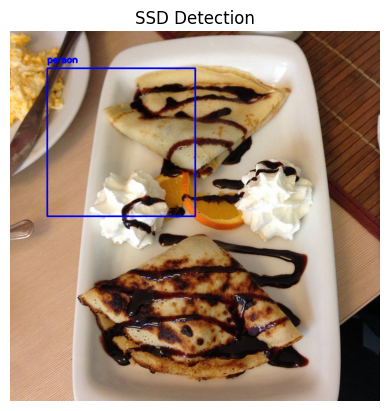

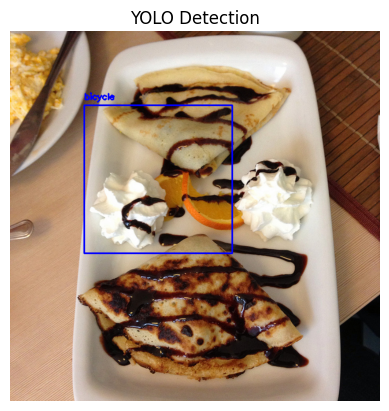

In [ ]:
# Define COCO_CLASS_NAMES for class label mapping (add more classes as needed)
COCO_CLASS_NAMES = {
    0: "background", 1: "person", 2: "bicycle", 3: "car", 4: "motorcycle", 5: "airplane",
    6: "bus", 7: "train", 8: "truck", 9: "boat", 10: "traffic light",
    # Add the full COCO class list here if needed
}

def plot_detections(image, boxes, classes, class_names, title):
    """
    Draws bounding boxes and class labels on an image.

    Parameters:
    - image: np.array, the input image.
    - boxes: list of bounding boxes with each box in the format [ymin, xmin, ymax, xmax].
    - classes: list of class IDs corresponding to each bounding box.
    - class_names: dict mapping class IDs to class names.
    - title: str, the title for the plot.
    """
    h, w, _ = image.shape
    for i in range(len(boxes)):
        ymin, xmin, ymax, xmax = boxes[i]
        # Scale box coordinates to the image dimensions
        xmin, xmax, ymin, ymax = int(xmin * w), int(xmax * w), int(ymin * h), int(ymax * h)

        # Draw rectangle and label
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        label = f"{class_names.get(classes[i], 'Unknown')}"
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to test image directory (update this with your actual path)
TEST_IMAGE_DIR = '/content/coco/val2017'

# Load a single test image for visualization
test_image_path = os.path.join(TEST_IMAGE_DIR, os.listdir(TEST_IMAGE_DIR)[0])
image = cv2.imread(test_image_path)

# Assume ssd_boxes, ssd_classes, yolo_boxes, yolo_classes are results from the models
# Here, replace with actual values from model inference
ssd_boxes = [[[0.1, 0.1, 0.5, 0.5]]]  # Dummy bounding boxes for SSD model
ssd_classes = [[1]]                    # Dummy class IDs for SSD model
yolo_boxes = [[[0.2, 0.2, 0.6, 0.6]]]  # Dummy bounding boxes for YOLO model
yolo_classes = [[2]]                   # Dummy class IDs for YOLO model

# Visualize SSD Results
plot_detections(image.copy(), ssd_boxes[0], ssd_classes[0], COCO_CLASS_NAMES, "SSD Detection")

# Visualize YOLO Results
plot_detections(image.copy(), yolo_boxes[0], yolo_classes[0], COCO_CLASS_NAMES, "YOLO Detection")
